In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: >

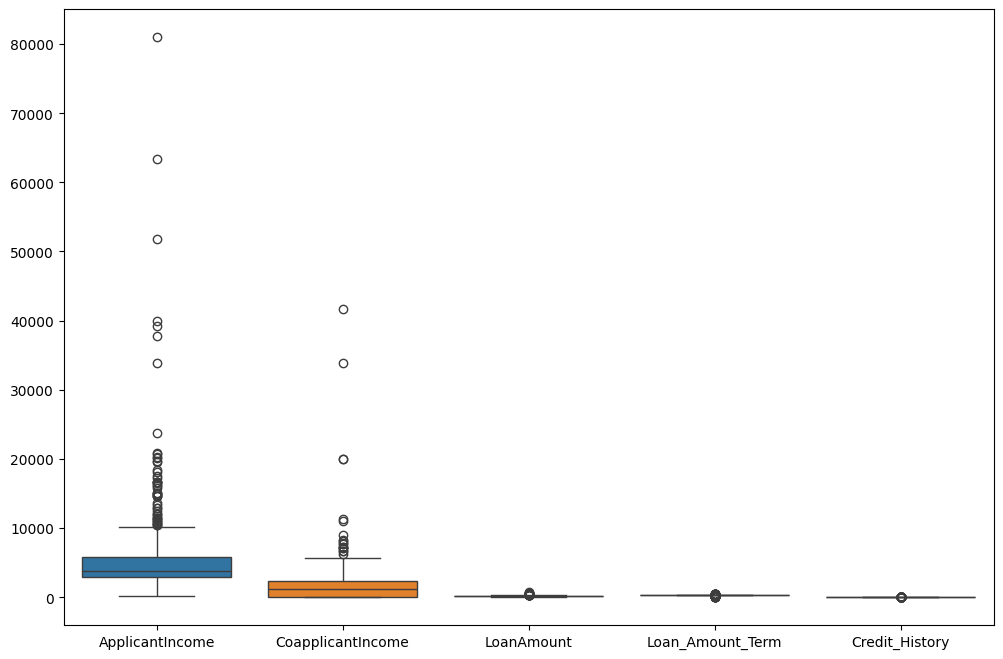

In [8]:
# outliers checking
plt.figure(figsize = (12,8))
sns.boxplot(data = df)

In [9]:
#fill the null values of numerical colomns
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())



In [10]:
#fill the null values of non-numerical colomns
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
#dropping loan_id, counting categorical and numerical colomns
df = df.drop(columns = ['Loan_ID'])

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print(categorical_columns)

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)


['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


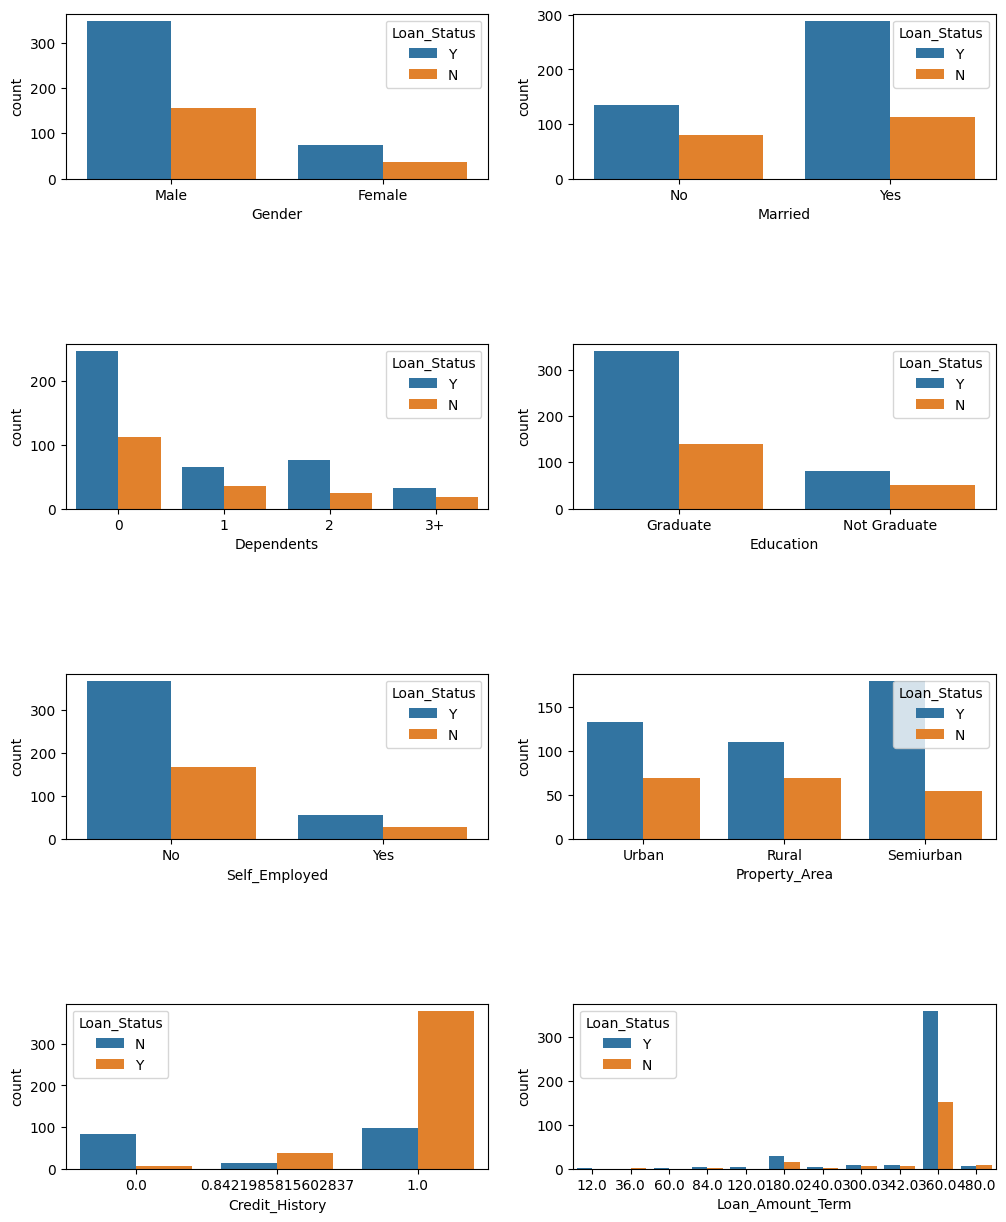

In [13]:
#visualization-categorical column

fig,axes = plt.subplots(4,2, figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col, data=df, hue="Loan_Status", ax=axes[row,col])

plt.subplots_adjust(hspace=1)    

Plots above convey following things about the dataset:

Loan Approval Status: About 2/3rd of applicants have been granted loan.<br>
Sex: There are more Men than Women (approx. 3x)<br>
Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.<br>
Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.<br>
Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval<br>
Employment: 5/6th of population is not self employed.<br>
Property Area: More applicants from Semi-urban and also likely to be granted loans.<br>
Applicant with credit history are far more likely to be accepted.<br>
Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).<br>

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  614.000000
mean       5403.459283        1621.245798  145.752443
std        6109.041673        2926.248369   84.107233
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.250000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  164.750000
max       81000.000000       41667.000000  700.000000


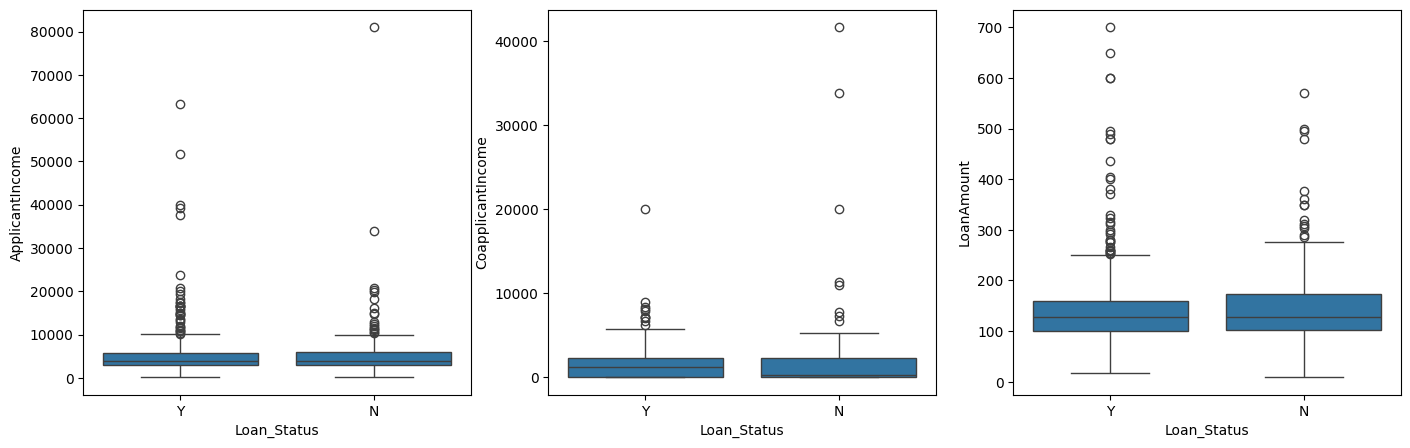

In [14]:
#Visualization-numerical column

fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col, data=df, x='Loan_Status', ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

Not any useful insight from this numerical plots

<Axes: >

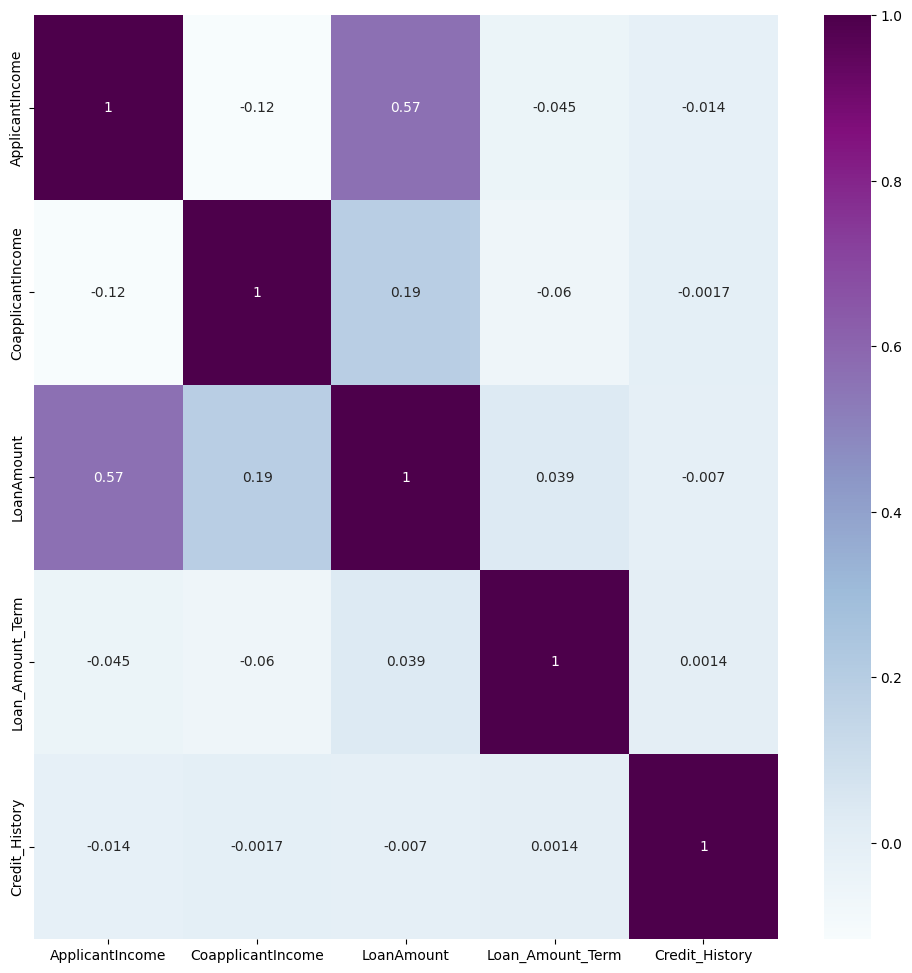

In [15]:
numerical_column = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
corr = df[numerical_column].corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot=True, cmap = 'BuPu') 

In [16]:
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000


In [17]:
df['Total_Income'] = df['ApplicantIncome']+df['CoapplicantIncome']

# Applying Log Transformation



C:\Users\varti\AppData\Local\Temp\ipykernel_18636\3368986.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmountlog'])


<Axes: xlabel='LoanAmountlog', ylabel='Density'>

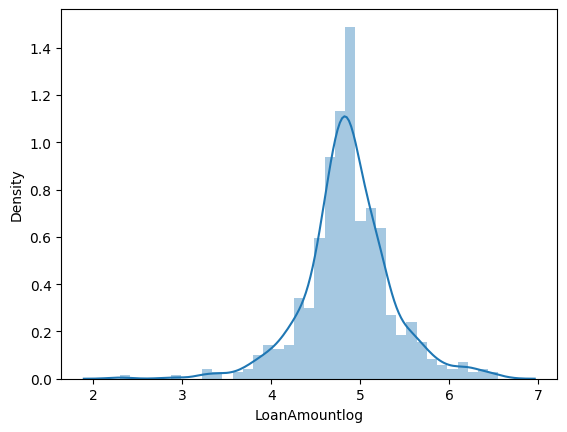

In [18]:
df['LoanAmountlog'] = np.log(df['LoanAmount']+1)
sns.distplot(df['LoanAmountlog'])

C:\Users\varti\AppData\Local\Temp\ipykernel_18636\2009751955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncomelog'])


<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

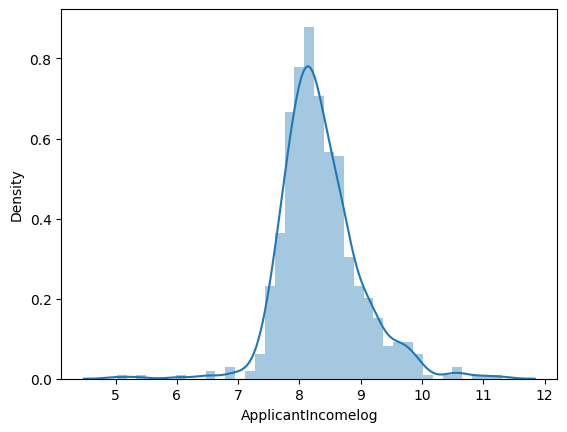

In [19]:
df['ApplicantIncomelog'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncomelog'])

C:\Users\varti\AppData\Local\Temp\ipykernel_18636\1401573442.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term_log'])


<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

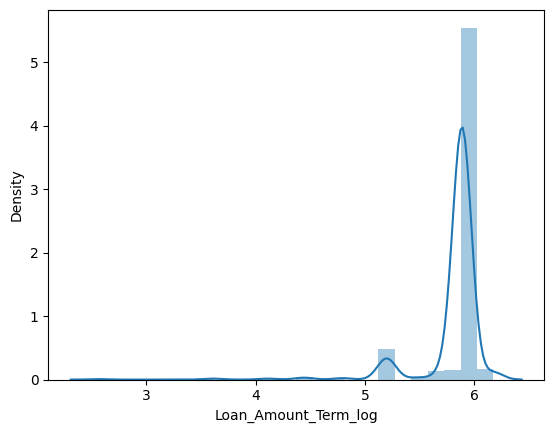

In [20]:
df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df['Loan_Amount_Term_log'])

C:\Users\varti\AppData\Local\Temp\ipykernel_18636\3393825276.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Income_log'])


<Axes: xlabel='Total_Income_log', ylabel='Density'>

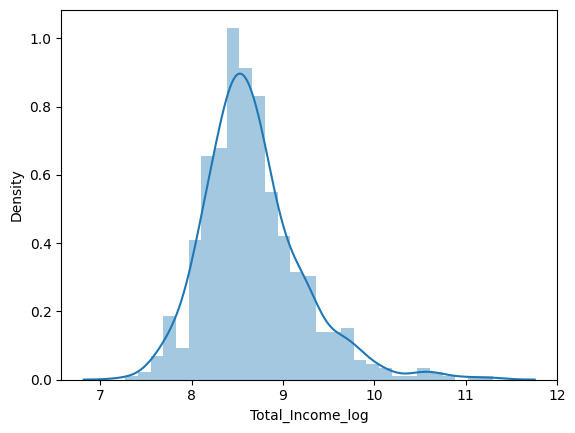

In [21]:
df['Total_Income_log'] = np.log(df['Total_Income']+1)
sns.distplot(df['Total_Income_log'])

In [22]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LoanAmountlog,ApplicantIncomelog,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,4.859812,8.674197,5.888878,8.674197
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,4.859812,8.430327,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,4.204693,8.006701,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,4.795791,7.857094,5.888878,8.505525
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,4.955827,8.699681,5.888878,8.699681


In [23]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LoanAmountlog,ApplicantIncomelog,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,4.859812,8.674197,5.888878,8.674197
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,4.859812,8.430327,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,4.204693,8.006701,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,4.795791,7.857094,5.888878,8.505525
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,4.955827,8.699681,5.888878,8.699681


In [24]:
# Encoding Technique - Lable Encoding(One Hot Encoding)
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])



In [25]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LoanAmountlog,ApplicantIncomelog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0,4.859812,8.674197,5.888878,8.674197
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,4.859812,8.430327,5.888878,8.714732
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,4.204693,8.006701,5.888878,8.006701
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,4.795791,7.857094,5.888878,8.505525
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,4.955827,8.699681,5.888878,8.699681


In [26]:
df.dtypes

Gender                    int64
Married                   int64
Dependents                int64
Education                 int64
Self_Employed             int64
ApplicantIncome           int64
CoapplicantIncome       float64
LoanAmount              float64
Loan_Amount_Term        float64
Credit_History          float64
Property_Area             int64
Loan_Status               int64
Total_Income            float64
LoanAmountlog           float64
ApplicantIncomelog      float64
Loan_Amount_Term_log    float64
Total_Income_log        float64
dtype: object

In [27]:
# Split independent and dependent features
X = df.drop(columns = ['Loan_Status'], axis=1)
y = df['Loan_Status']

In [28]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,LoanAmountlog,ApplicantIncomelog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,5849.0,4.859812,8.674197,5.888878,8.674197
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,6091.0,4.859812,8.430327,5.888878,8.714732
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,3000.0,4.204693,8.006701,5.888878,8.006701
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,4941.0,4.795791,7.857094,5.888878,8.505525
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,6000.0,4.955827,8.699681,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,2900.0,4.276666,7.972811,5.888878,7.972811
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,4106.0,3.713572,8.320448,5.198497,8.320448
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,8312.0,5.537334,8.996280,5.888878,9.025576
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,7583.0,5.236442,8.933796,5.888878,8.933796


In [30]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

# Model-1   Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score


In [33]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())


Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6363103045464551
Validation Mean Accuracy:  0.6862914862914863


Overfitting Problem
We can see from above metrics that Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. Hence, model is overfit. We will try some Hyper-parameter tuning and see if it helps.

First let's try tuning 'Max_Depth' of tree

<Axes: xlabel='Max_Depth', ylabel='Values'>

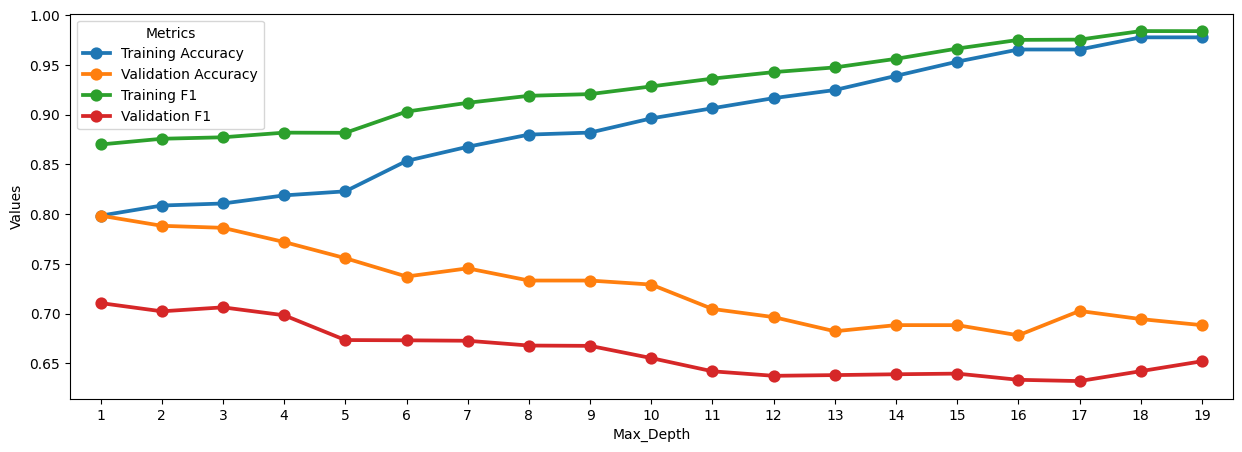

In [34]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

From above graph, we can conclude that keeping 'Max_Depth' = 3 will yield optimum Test accuracy and F1 score Optimum Test Accuracy ~ 0.805; Optimum F1 Score: ~0.7

Visulazing Decision Tree with Max Depth = 3

In [35]:
!pip install graphviz


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
!sudo apt-get install graphviz

Sudo is disabled on this machine. To enable it, go to the ]8;;ms-settings:developers\Developer Settings page]8;;\ in the Settings app


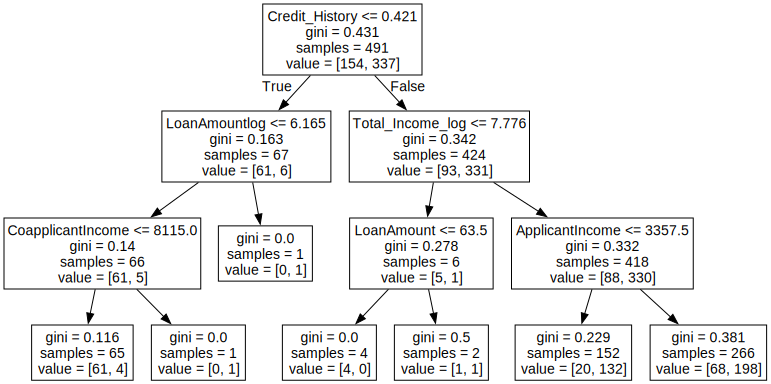

In [37]:
import graphviz 
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

From above tree, we could see that some of the leafs have less than 5 samples hence our classifier might overfit. We can sweep hyper-parameter 'min_samples_leaf' to further improve test accuracy by keeping max_depth to 3

<Axes: xlabel='Min_Samples_leaf', ylabel='Values'>

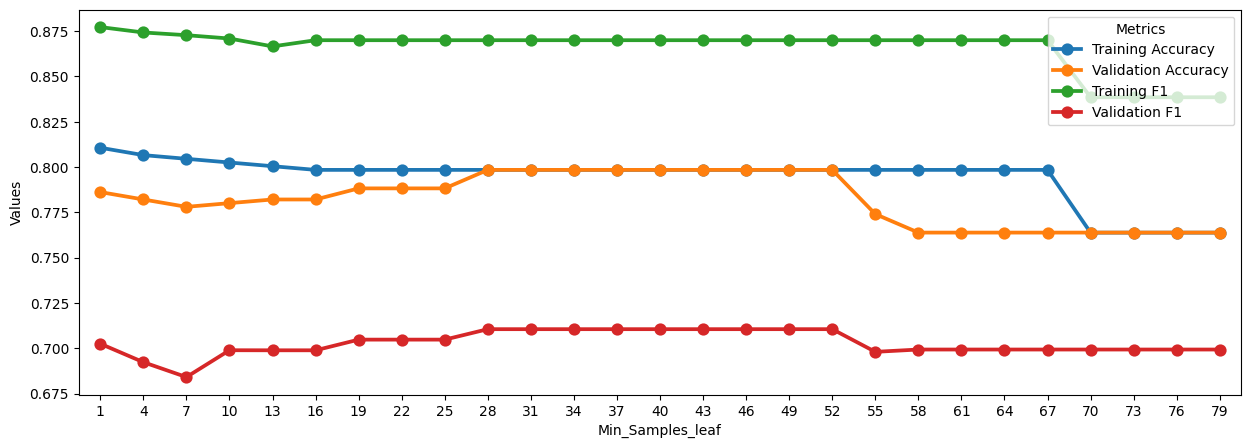

In [39]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

From above plot, we will choose Min_Samples_leaf to 35 to improve test accuracy.

Let's use this Decision Tree classifier on unseen test data and evaluate Test Accuracy, F1 Score and Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Test Accuracy:  0.8536585365853658
Test F1 Score:  0.9032258064516129
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


Mis-classifications
It can be seen that majority of the misclassifications are happening because of Loan Reject applicants being classified as Accept.

Let's look into Random Forest Classifier if it can reduce mis-classifications

# Model-2  Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8699080157687253
Train Accuracy  0.7983706720977597
Validation Mean F1 Score:  0.7105036634489533
Validation Mean Accuracy:  0.7983714698000413


In [52]:
y_pred = rf_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.9032258064516129
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


Random Forest gives same results as Decision Tree Classifier. Finally, we will try Logistic Regression Model 



# Model-3  Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train,y_train)
y_pred_model1 = model1.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model1)

C:\Users\varti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
accuracy*100

86.1788617886179

In [79]:
score = cross_val_score(model1,X,y,cv=5)
score

C:\Users\varti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\varti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

array([0.81300813, 0.77235772, 0.7804878 , 0.84552846, 0.81967213])

Logistic Regresion does slightly better than Decision Tree and Random forest

# Accuracy is comes out to be 86%